## Importando Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Enlazando Carpeta de Google Drive con Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Indicando directorio de trabajo

In [ ]:
os.chdir("/content/drive/MyDrive/kaggle/top-play-store-games")

## Leo el CSV

In [ ]:
data = pd.read_csv("android-games.csv")

##Este DataSet proporcionará un listado de los 100 mejores juegos en la mayoría de las categorías de la tienda virtual Play Store. Sin embargo, cabe destacar que una categoría cuenta con 126 juegos y otra con 104 juegos. Este conjunto de datos fue publicado en Noviembre de 2021.
##Su licencia es abierta, fue tomado de Kaggle. Para mas informacion visitar: https://www.kaggle.com/datasets/dhruvildave/top-play-store-games
###Las categorias son: Juegos de Accion, Juegos de Aventura, Juegos de Arcade, Juegos de Mesa, Juegos de Cartas, Juegos de Casino, Juegos Casuales, Juegos Educacionales, Juegos de Musica, Juegos de Rompecabezas, Juegos de Carrera, Juegos de Rol, Juegos de Simulacion, Juegos de Deportes, Juegos de Estrategia, Juegos de Trivia, Juegos del Mundo.

In [ ]:
category_unique = data['category'].unique()
print(category_unique)

['GAME ACTION' 'GAME ADVENTURE' 'GAME ARCADE' 'GAME BOARD' 'GAME CARD'
 'GAME CASINO' 'GAME CASUAL' 'GAME EDUCATIONAL' 'GAME MUSIC' 'GAME PUZZLE'
 'GAME RACING' 'GAME ROLE PLAYING' 'GAME SIMULATION' 'GAME SPORTS'
 'GAME STRATEGY' 'GAME TRIVIA' 'GAME WORD']


#Este DataSet cuenta con 15 columnas denominadas: 
###title: Es el nombre del juego
###total ratings: La cantidad de personas que calificaron el juego
###installs: La cantidad de personas que se descargaron el juego
###average rating: El promedio de calificaciones
###growth (30 days): La tasa de crecimiento en 30 dias
###growth (60 days):	La tasa de crecimiento en 60 dias
###price: El precio del juego
###category: La categoria del juego
###5 star ratings: La cantidad de personas que lo calificaron con 5 estrellas
###4 star ratings:	La cantidad de personas que lo calificaron con 4 estrellas
###3 star ratings: La cantidad de personas que lo calificaron con 3 estrellas
###2 star ratings: La cantidad de personas que lo calificaron con 2 estrellas
###1 star ratings: La cantidad de personas que lo calificaron con 1 estrellas
###paid: Indica si el juego es pago o gratuito

## Muestro los primeros registros del listado

In [ ]:
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


## Muestro los ultimos registros del listado

In [ ]:
data.tail(4)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False
1729,100,Pinturillo 2,108917,10.0 M,3,1.1,2.5,0.0,GAME WORD,50813,16480,11825,6166,23631,False


## Obtengo Info General del dataset
De esta manera, podemos identificar cualquier dato nulo presente y analizar los tipos de datos que se encuentran en el conjunto de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


## Vemos la forma del dataset 
(cantidad de registros y cantidad de columnas)
###Los registros son la cantidad de juegos, en este caso son 1730, y las columnas es la información relacionada a cada juego, en este caso, 15.

In [ ]:
data.shape

(1730, 15)

In [ ]:
dict(data.count())

{'rank': 1730,
 'title': 1730,
 'total ratings': 1730,
 'installs': 1730,
 'average rating': 1730,
 'growth (30 days)': 1730,
 'growth (60 days)': 1730,
 'price': 1730,
 'category': 1730,
 '5 star ratings': 1730,
 '4 star ratings': 1730,
 '3 star ratings': 1730,
 '2 star ratings': 1730,
 '1 star ratings': 1730,
 'paid': 1730}

In [ ]:
data.size

25950

## Obteniendo el tipo de datos de cada columna

In [ ]:
dict(data.dtypes)

{'rank': dtype('int64'),
 'title': dtype('O'),
 'total ratings': dtype('int64'),
 'installs': dtype('O'),
 'average rating': dtype('int64'),
 'growth (30 days)': dtype('float64'),
 'growth (60 days)': dtype('float64'),
 'price': dtype('float64'),
 'category': dtype('O'),
 '5 star ratings': dtype('int64'),
 '4 star ratings': dtype('int64'),
 '3 star ratings': dtype('int64'),
 '2 star ratings': dtype('int64'),
 '1 star ratings': dtype('int64'),
 'paid': dtype('bool')}

# Describe

This function gives the mean, std and IQR values. 
function excludes the character columns and given summary about numeric columns. 
'include' is the argument which is used to pass necessary information regarding what columns need to be considered for summarizing. Takes the list of values; by default, 'number'.

* object − Summarizes String columns
* number − Summarizes Numeric columns
* all − Summarizes all columns together (Should not pass it as a list value)

In [ ]:
data.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


##Nos muestra las columnas que son de tipo Objeto


In [ ]:
data.describe(include=['object'])

,title,installs,category
count,1730,1730,1730
unique,1675,9,17
top,Solitaire,10.0 M,GAME CARD
freq,36,805,126


## Chequeando Nulls Values

In [ ]:
dict(data.isnull().sum())

{'rank': 0,
 'title': 0,
 'total ratings': 0,
 'installs': 0,
 'average rating': 0,
 'growth (30 days)': 0,
 'growth (60 days)': 0,
 'price': 0,
 'category': 0,
 '5 star ratings': 0,
 '4 star ratings': 0,
 '3 star ratings': 0,
 '2 star ratings': 0,
 '1 star ratings': 0,
 'paid': 0}

## Dropeando registros que considero que estan de más
Dado el enfoque y propósito del análisis en curso, decidí prescindir de la inclusión de la columna "Price", dado que el enfoque principal radica en la distinción entre juegos de pago y gratuitos, información que ya está representada en una columna existente. Asimismo, se ha optado por excluir las columnas "4 star ratings", "3 star ratings" y "2 star ratings" debido a la relevancia otorgada a las calificaciones extremas de 5 estrellas y 1 estrella.


In [ ]:
data=data.drop(['price','4 star ratings', '3 star ratings','2 star ratings'], axis=1) #al no ser valores nulos tuve que usar otro comando

##Esto hizo que la cantidad de columnas pasen de ser 15 a ser 11

## Confirmando que se hayan eliminado


In [ ]:
dict(data.count())

{'rank': 1730,
 'title': 1730,
 'total ratings': 1730,
 'installs': 1730,
 'average rating': 1730,
 'growth (30 days)': 1730,
 'growth (60 days)': 1730,
 'category': 1730,
 '5 star ratings': 1730,
 '1 star ratings': 1730,
 'paid': 1730}

##Primera hipótesis: Los juegos de la categoría "GAME ACTION" con mayor número de descargas.

Considero que esta hipótesis es verdadera, debido a que estos juegos suelen estar respaldados por una amplia estrategia de publicidad y su popularidad es tal que a menudo son adaptados en forma de películas.


## Tuve que convertir a la columna 'installs' de objeto a un tipo float (valor numerico) para poder ordenar los valores de mayor a menor, antes era de tipo "objeto", el cual no se puede ordenar de mayor a menor

In [ ]:
data['installs'] = data['installs'].str.replace('[^\d\.]', '', regex=True)

In [ ]:
data['installs'] = pd.to_numeric(data['installs'])

Confirmamos que 'installs' paso a ser de tipo float

In [ ]:
dict(data.dtypes)

{'rank': dtype('int64'),
 'title': dtype('O'),
 'total ratings': dtype('int64'),
 'installs': dtype('float64'),
 'average rating': dtype('int64'),
 'growth (30 days)': dtype('float64'),
 'growth (60 days)': dtype('float64'),
 'category': dtype('O'),
 '5 star ratings': dtype('int64'),
 '1 star ratings': dtype('int64'),
 'paid': dtype('bool')}

## Después de realizar la conversión de los datos a valores numéricos, se procede a agrupar las categorías y ordenar las descargas de mayor a menor.
Este análisis confirmó de manera consistente que los juegos de acción se encuentran consistentemente en la posición más alta, liderando la lista en términos de descargas.

In [ ]:
resultados = data.groupby('category').sum().sort_values('installs', ascending=False)
print(resultados)

                   rank  total ratings  installs  average rating  \
category                                                           
GAME ACTION        5050      401134360    7410.0             389   
GAME ARCADE        5050      179377991    7161.0             391   
GAME CASUAL        5050      247086604    6397.0             395   
GAME TRIVIA        5050       29822172    4786.0             385   
GAME RACING        5050      113902680    4675.0             396   
GAME PUZZLE        5050       94669292    3621.0             394   
GAME SPORTS        5050      135382882    3361.0             392   
GAME MUSIC         5050       21630202    2947.0             380   
GAME SIMULATION    5050       93414165    2771.0             394   
GAME CARD          6164       41908116    2572.0             496   
GAME STRATEGY      5050      185656975    2391.0             388   
GAME EDUCATIONAL   5050       15298035    2289.0             389   
GAME BOARD         5050       44574307    2123.0

<ipython-input-77-b05d10dd5493>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultados = data.groupby('category').sum().sort_values('installs', ascending=False)


##Segunda hipótesis: Los juegos de la categoría "GAME CARD" son los menos descargados.

Sostengo esta hipótesis basándome en la premisa de que los juegos de cartas, como los pertenecientes a la categoría "GAME CARD", son más comúnmente asociados con actividades de reuniones familiares o entre amigos. Además, considero que la posesión de un mazo de cartas por parte de una familia no es algo inusual, lo que puede disminuir la necesidad de descargar juegos de esta categoría.

En este caso, mi hipótesis inicial no resultó ser completamente precisa, pero los juegos de la categoría "GAME CARD" se encuentran efectivamente entre los menos descargados, esto indica que hay una demanda relativamente baja para este tipo de juegos en formato digital. 

In [ ]:
resultados = data.groupby('category').sum().sort_values('installs', ascending=True)
print(resultados)

                   rank  total ratings  installs  average rating  \
category                                                           
GAME CASINO        5050       36190309    1271.0             395   
GAME WORD          5255       41013474    1281.0             410   
GAME ROLE PLAYING  5050       70876483    1408.0             389   
GAME ADVENTURE     5050       89356174    1803.0             385   
GAME BOARD         5050       44574307    2123.0             393   
GAME EDUCATIONAL   5050       15298035    2289.0             389   
GAME STRATEGY      5050      185656975    2391.0             388   
GAME CARD          6164       41908116    2572.0             496   
GAME SIMULATION    5050       93414165    2771.0             394   
GAME MUSIC         5050       21630202    2947.0             380   
GAME SPORTS        5050      135382882    3361.0             392   
GAME PUZZLE        5050       94669292    3621.0             394   
GAME RACING        5050      113902680    4675.0

<ipython-input-78-82902eeca947>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultados = data.groupby('category').sum().sort_values('installs', ascending=True)


##Tercera hipótesis: Los juegos de acción tienen nombres más largos.

Esta hipótesis se basa en la observación de que los juegos de acción suelen tener títulos más extensos. 

Se especula que esto se debe a la competencia intensa en esta categoría, dado que los juegos de acción son extremadamente populares y existen numerosos títulos disponibles, es crucial para los desarrolladores crear nombres distintivos y llamativos para destacar entre la competencia. 

Un nombre llamativo y descriptivo puede ayudar a captar la atención de los jugadores potenciales y comunicar la experiencia única que ofrece el juego.


Imprimimos el nombre mas largo de cada categoria y el mas largo fue de accion

In [ ]:
indices_max = data.groupby('category')['title'].apply(lambda x: x.str.len().idxmax())

# Obtener los resultados con los títulos más largos y sus categorías
resultados = data.loc[indices_max, ['title', 'category']]

# Imprimir los resultados
print(resultados)

                                                  title           category
5     Call of Duty®: Mobile - Season 4: Spurned & Bu...        GAME ACTION
135   Diggy's Adventure: Mine Maze Levels & Pipe Puz...     GAME ADVENTURE
254   Cookie Run: OvenBreak - Endless Running Platfo...        GAME ARCADE
320   LANDLORD TYCOON Business Management Investing ...         GAME BOARD
411   Solitaire TriPeaks: Play Free Solitaire Card G...          GAME CARD
526   Zynga Poker™ – Free Texas Holdem Online Card G...        GAME CASINO
696    Cow Evolution: Crazy Cow Making Idle Merge Games        GAME CASUAL
726   Toca Life World: Build stories & create your w...   GAME EDUCATIONAL
829   Piano Free - Keyboard with Magic Tiles Music G...         GAME MUSIC
936   Disney Frozen Free Fall - Play Frozen Puzzle G...        GAME PUZZLE
1047  Drift Max Pro - Car Drifting Game with Racing ...        GAME RACING
1159  Day R Survival – Apocalypse, Lone Survivor and...  GAME ROLE PLAYING
1243  Cash, Inc. Money Cl

##Gráficos

###El primer gráfico ilustra la agregación de las cantidades de descargas para cada juego, organizados en función de sus categorías correspondientes. 
###Recordar no ejecutar este codigo sin haber ejecutado el que convierte a "installs" en "Float"

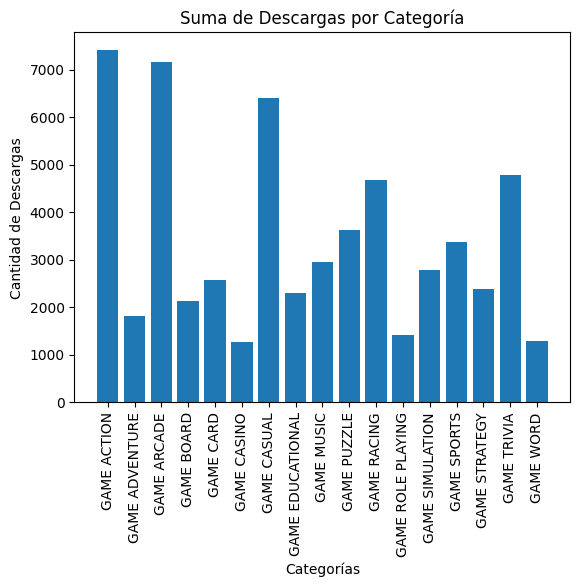

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

suma_descargas = data.groupby('category')['installs'].sum()


plt.bar(suma_descargas.index, suma_descargas.values)
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Descargas')
plt.title('Suma de Descargas por Categoría')

# Rotar las etiquetas del eje
plt.xticks(rotation=90)

plt.show()

###En este grafico vemos una representacion de la diferencia de cantidad entre juego pagos y juegos gratuitos.
###Hay mas juegos gratuitos que pagos, o mejor dicho los juegos gratuitos tienen mas exito, porque hay que recordar que no estan todos los juegos de la Play Store, sino que hay 100 de cada categoria

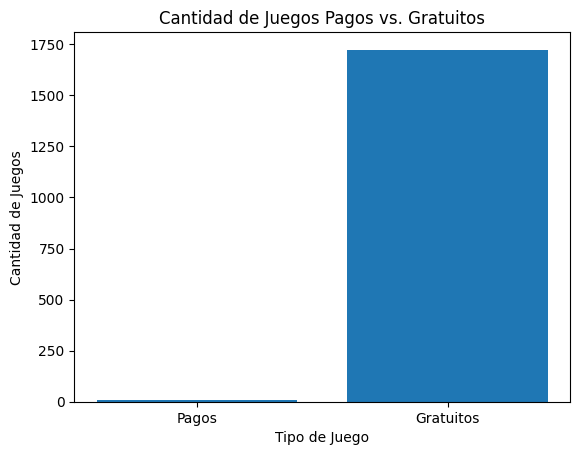

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

pagos = data[data['paid'] == True]['paid'].count()
gratuitos = data[data['paid'] == False]['paid'].count()

categorias = ['Pagos', 'Gratuitos']
cantidad_juegos = [pagos, gratuitos]

plt.bar(categorias, cantidad_juegos)
plt.xlabel('Tipo de Juego')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos Pagos vs. Gratuitos')

plt.show()

##Para ser mas exactos, hay unicamente 7 juegos pagos


In [ ]:
data[data['paid']==True].count() 

rank                7
title               7
total ratings       7
installs            7
average rating      7
growth (30 days)    7
growth (60 days)    7
category            7
5 star ratings      7
1 star ratings      7
paid                7
dtype: int64

##Y hay 1723 Gratuitos

In [ ]:
data[data['paid']==False].count() 

rank                1723
title               1723
total ratings       1723
installs            1723
average rating      1723
growth (30 days)    1723
growth (60 days)    1723
category            1723
5 star ratings      1723
1 star ratings      1723
paid                1723
dtype: int64

##Segun el creador del Data Set, habia 100 juegos por categoria, pero como los numeros no concordaban, se creo este gráfico que nos muestra que hay 100 de la mayoria de las categorias, pero no todas.

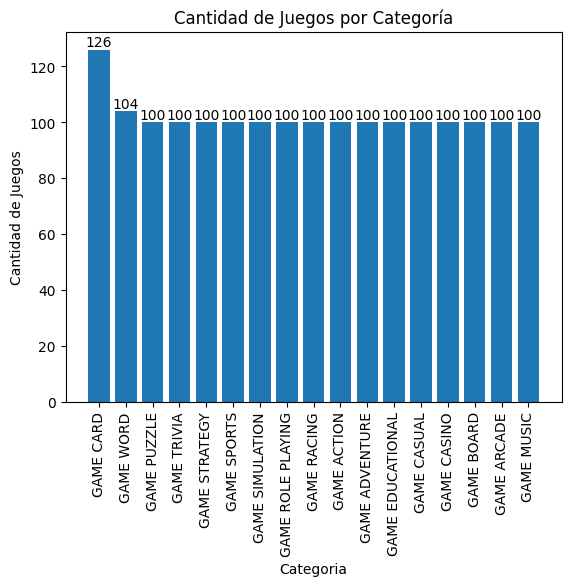

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

cantidad_por_categoria = data['category'].value_counts()

plt.bar(cantidad_por_categoria.index, cantidad_por_categoria.values)
plt.xlabel('Categoria')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Categoría')

# Agregar la cantidad exacta
for i, v in enumerate(cantidad_por_categoria.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje
plt.xticks(rotation=90)

plt.show()

#El presente gráfico muestra un HeatMap que representa los datos del conjunto de datos

<ipython-input-85-b7283c3aa7c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


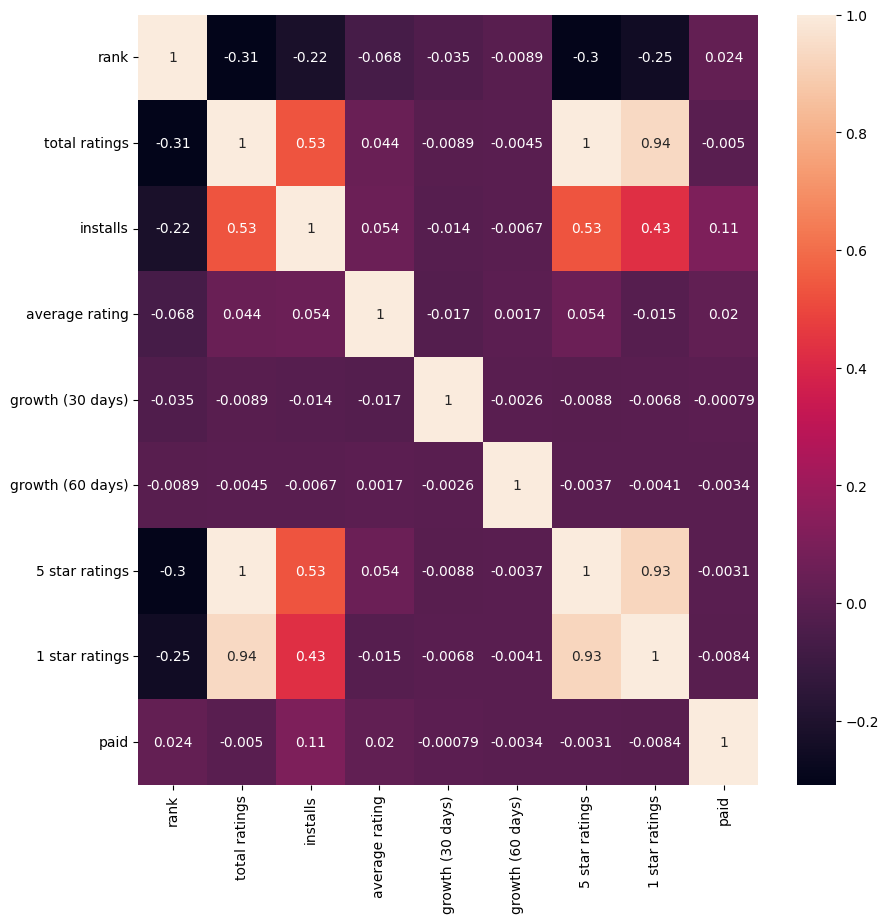

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

#Predicciones:
##1) Prediccion de la cantidad de instalaciones de un juego en función de sus calificaciones totales. 

In [ ]:
X = data[['total ratings']]
y = data['installs']

In [ ]:
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
prediccion = regr.predict(X)

###Al graficar los puntos originales de nuestro conjunto de datos ('total ratings' en el eje x y 'installs' en el eje y) y trazar la línea de predicción generada por nuestro modelo, podemos observar que hay una discrepancia significativa entre los puntos reales y las predicciones. 
###La diferencia entre los puntos originales y la línea de predicción sugiere que existen otros factores influyentes que no estamos teniendo en cuenta en nuestro modelo. 

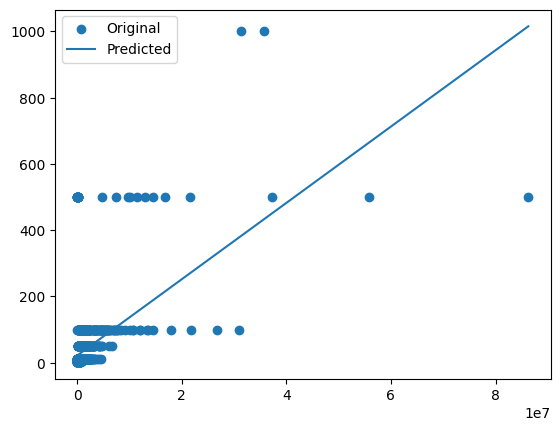

In [ ]:
plt.scatter(data['total ratings'], data['installs'], label='Original')
plt.plot(X, prediccion, label='Predicted') #ploteamos la variable predecida
plt.legend()
plt.show()

###Al evaluar el rendimiento de nuestro modelo de predicción, encontramos que los resultados del coeficiente de determinación (r2_score) y del error cuadrático medio (mean_squared_error) no son favorables. Estos indicadores nos ayudan a medir qué tan bien se ajustan nuestras predicciones a los valores reales.
###En nuestro caso, los valores obtenidos indican que nuestro modelo no se ajusta de manera precisa a los datos, lo que implica que las predicciones de la cantidad de instalaciones basadas en las calificaciones totales no son confiables. 

In [ ]:
print(r2_score(y, prediccion))

0.2816270324147335


In [ ]:
print(mean_squared_error(y, prediccion))

3975.701991869701


##2) Predicción del total de calificaciones en función de las calificaciones de 5 estrellas y 1 estrella

In [ ]:
X2 = data[['5 star ratings', '1 star ratings']]
y2 = data['total ratings']

In [ ]:
regr = LinearRegression()
regr.fit(X2, y2)

LinearRegression()

In [6]:
import math
[str(round(math.pi)) for i in range (0, 6)]

['3', '3', '3', '3', '3', '3']

In [ ]:
prediccion2 = regr.predict(X2)

##Obtuvimos un valor de R2 alto, lo cual indica que el modelo es capaz de explicar la mayor parte de la variabilidad de la variable dependiente, y un valor de error cuadrático medio alto, lo cual indica una discrepancia entre los valores predichos por el modelo y los valores reales.
##Esto indica que si bien el modelo es capaz de explicar una gran proporción de la variación observada en la variable que está siendo predicha, las predicciones individuales estan bastante alejadas de los valores reales.



In [ ]:
print(r2_score(y2, prediccion2))

0.9981865782531344


In [ ]:
print(mean_squared_error(y2, prediccion2))

21313063680.171032


##En el siguiente gráfico se indica que el modelo predice valores que están proporcionalmente cerca de los valores reales, es decir, que existe una correlación positiva entre los valores reales y los valores predichos, pero puede haber algunas discrepancias.
##La presencia de esos puntos dispersos en la misma línea sugiere que hay casos en los que las predicciones pueden ser ligeramente inexactas, pero aún así siguen una tendencia general. Esto podría indicar que el modelo tiene una buena capacidad para capturar la relación subyacente entre las variables, pero aún existen ciertas variaciones que no son completamente explicadas.

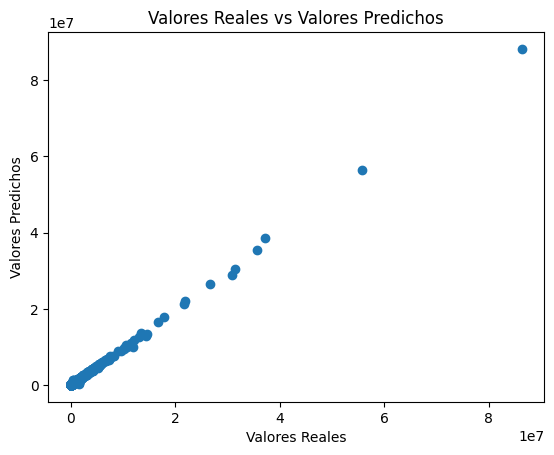

In [ ]:
plt.scatter(y2, prediccion2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()

##Como se puede ver en el registro del mini dataset, hay una diferencia significativa entre el valor real y el valor predicho de unos cuantos datos, lo que significa que el modelo no pudo predecir con precisión el valor real.

##Esta diferencia es importante, ya que indica que el modelo no es muy preciso en sus predicciones. Si la diferencia entre los valores reales y predichos es demasiado grande, puede afectar la confiabilidad de las predicciones y limitar la utilidad del modelo en ciertos casos.



In [ ]:
mini_dataset = pd.DataFrame({'Valores Reales': y2, 'Valores Predichos': prediccion2.round(), 'Diferencia': y2 - prediccion2.round()})
mini_dataset = mini_dataset.sort_values('Diferencia', ascending=False)
pd.set_option('display.max_rows', None)
print(mini_dataset)

      Valores Reales  Valores Predichos  Diferencia
1427        30852360         28894676.0   1957684.0
6           11936964         10078460.0   1858504.0
4           14464235         12994688.0   1469547.0
101         14541662         13304886.0   1236776.0
405          1590733           424419.0   1166314.0
404          1590733           574660.0   1016073.0
626         31367945         30409151.0    958794.0
403          1590733           632690.0    958043.0
633         10159890          9430259.0    729631.0
1526         7334155          6632419.0    701736.0
631         10721875         10063492.0    658383.0
7            9633929          9016395.0    617534.0
1227         5213933          4620358.0    593575.0
1328         6856324          6267278.0    589046.0
1226         5541105          4963512.0    577593.0
635          8306868          7762810.0    544058.0
1228         3622549          3101165.0    521384.0
1026        10188038          9724231.0    463807.0
1435        

# Funciones en Pandas

- count()	Number of non-null observations
- sum()	Sum of values
- mean()	Mean of Values
- median()	Median of Values
- mode()	Mode of values
- std()	Standard Deviation of the Values
- min()	Minimum Value
- max()	Maximum Value
- abs()	Absolute Value
- prod()	Product of Values

In [ ]:
data['title'].sum()

"Garena Free Fire- World SeriesPUBG MOBILE - TraverseMobile Legends: Bang BangBrawl StarsSniper 3D: Fun Free Online FPS Shooting GameCall of Duty®: Mobile - Season 4: Spurned & BurnedAmong UsTemple Run 2PUBG MOBILE LITEGangstar Vegas: World of CrimePixel Gun 3D: FPS Shooter & Battle RoyaleBowmastersStandoff 2Talking Tom Gold RunGarena Liên Quân MobileBanana KongCrossy RoadWar Robots. 6v6 Tactical Multiplayer BattlesMORTAL KOMBAT: The Ultimate Fighting Game!Last Day on Earth: SurvivalAgar.ioDEER HUNTER CLASSICModern Combat 5: eSports FPSKick the BuddySpecial Forces Group 2DEAD TRIGGER 2 - Zombie Game FPS shooterMini Militia - Doodle Army 2Call of Duty®: Mobile - GarenaCATS: Crash Arena Turbo StarsInjustice: Gods Among UsSwamp AttackGUNSHIP BATTLE: Helicopter 3DReal Steel World Robot BoxingCritical Ops: Online Multiplayer FPS Shooting GameLINE Rangers - a tower defense RPG w/Brown & Cony!Worms Zone .io - Voracious SnakeSix-Guns: Gang ShowdownDEAD TARGET: Zombie Offline - Shooting GamesFR

In [ ]:
data.sum()

rank                                                            87169
title               Garena Free Fire- World SeriesPUBG MOBILE - Tr...
total ratings                                              1841294221
installs            500.0 M500.0 M100.0 M100.0 M500.0 M100.0 M100....
average rating                                                   6761
growth (30 days)                                             556603.1
growth (60 days)                                             212020.1
category            GAME ACTIONGAME ACTIONGAME ACTIONGAME ACTIONGA...
5 star ratings                                             1318660446
1 star ratings                                              175586268
paid                                                                7
dtype: object

In [ ]:
data.count()

rank                1730
title               1730
total ratings       1730
installs            1730
average rating      1730
growth (30 days)    1730
growth (60 days)    1730
category            1730
5 star ratings      1730
1 star ratings      1730
paid                1730
dtype: int64

In [ ]:
data.mean() #Mean of Values

<ipython-input-20-b6a92a8ae01a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean() #Mean of Values


rank                5.038671e+01
total ratings       1.064332e+06
installs            3.368035e+01
average rating      3.908092e+00
growth (30 days)    3.217359e+02
growth (60 days)    1.225550e+02
5 star ratings      7.622315e+05
1 star ratings      1.014950e+05
paid                4.046243e-03
dtype: float64

In [ ]:
data.median() #Median of Values

<ipython-input-21-c831f58ee112>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median() #Median of Values


rank                    50.0
total ratings       428606.5
installs                10.0
average rating           4.0
growth (30 days)         0.5
growth (60 days)         1.0
5 star ratings      296434.0
1 star ratings       33686.0
paid                     0.0
dtype: float64

In [ ]:
data.mode() #Mode of values

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),category,5 star ratings,1 star ratings,paid
0,3,Solitaire,406124,10.0,4.0,0.0,0.0,GAME CARD,299715,12653,False
1,10,NaN,507250,NaN,NaN,NaN,NaN,NaN,418115,18567,NaN
2,13,NaN,648068,NaN,NaN,NaN,NaN,NaN,431463,57090,NaN
3,19,NaN,1590733,NaN,NaN,NaN,NaN,NaN,1117298,70189,NaN


In [ ]:
data.std() #Standard Deviation of the Values

<ipython-input-24-a7a8831da4a0>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std() #Standard Deviation of the Values


rank                2.893674e+01
total ratings       3.429250e+06
installs            7.441448e+01
average rating      2.909734e-01
growth (30 days)    6.018915e+03
growth (60 days)    2.253892e+03
5 star ratings      2.538658e+06
1 star ratings      4.083745e+05
paid                6.349962e-02
dtype: float64

In [ ]:
data.min() #Minimum Value

rank                                                                1
title               100 PICS Quiz - Guess Trivia, Logo & Picture G...
total ratings                                                   32993
installs                                                          1.0
average rating                                                      2
growth (30 days)                                                  0.0
growth (60 days)                                                  0.0
category                                                  GAME ACTION
5 star ratings                                                  13975
1 star ratings                                                    545
paid                                                            False
dtype: object

In [ ]:
data.max() #Maximum Value

rank                                              100
title               🚓🚦Car Driving School Simulator 🚕🚸
total ratings                                86273129
installs                                       1000.0
average rating                                      4
growth (30 days)                             227105.7
growth (60 days)                              69441.4
category                                    GAME WORD
5 star ratings                               63546766
1 star ratings                               12495915
paid                                             True
dtype: object

In [ ]:
data["installs"].abs() #Absolute Value

0       500.0
1       500.0
2       100.0
3       100.0
4       500.0
        ...  
1725      1.0
1726      1.0
1727     10.0
1728      5.0
1729     10.0
Name: installs, Length: 1730, dtype: float64

In [ ]:
data.prod() #Product of Values

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-28-70f204ebbe66>:1: FutureWarning: The default value of numeric_only in DataFrame.prod is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.prod() #Product of Values


rank                0.0
total ratings       0.0
installs            inf
average rating      0.0
growth (30 days)    0.0
growth (60 days)    0.0
5 star ratings      0.0
1 star ratings      0.0
paid                0.0
dtype: float64

In [ ]:
frame = pd.DataFrame(data)
frame

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),category,5 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0,4,0.9,1.8,GAME WORD,101036,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0,4,0.9,2.3,GAME WORD,88950,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0,4,0.9,1.9,GAME WORD,64184,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0,4,1.9,4.1,GAME WORD,99987,2353,False


In [ ]:
frame[["title", "average rating"]]

,title,average rating
0,Garena Free Fire- World Series,4
1,PUBG MOBILE - Traverse,4
2,Mobile Legends: Bang Bang,4
3,Brawl Stars,4
4,Sniper 3D: Fun Free Online FPS Shooting Game,4
...,...,...
1725,زوايا - لعبة ستحرك زوايا عقلك,4
1726,Bible Word Puzzle - Free Bible Word Games,4
1727,Scrabble® GO - New Word Game,4
1728,Word Nut: Word Puzzle Games & Crosswords,4


In [ ]:
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),category,5 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,1084340,False


<ipython-input-26-b7283c3aa7c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


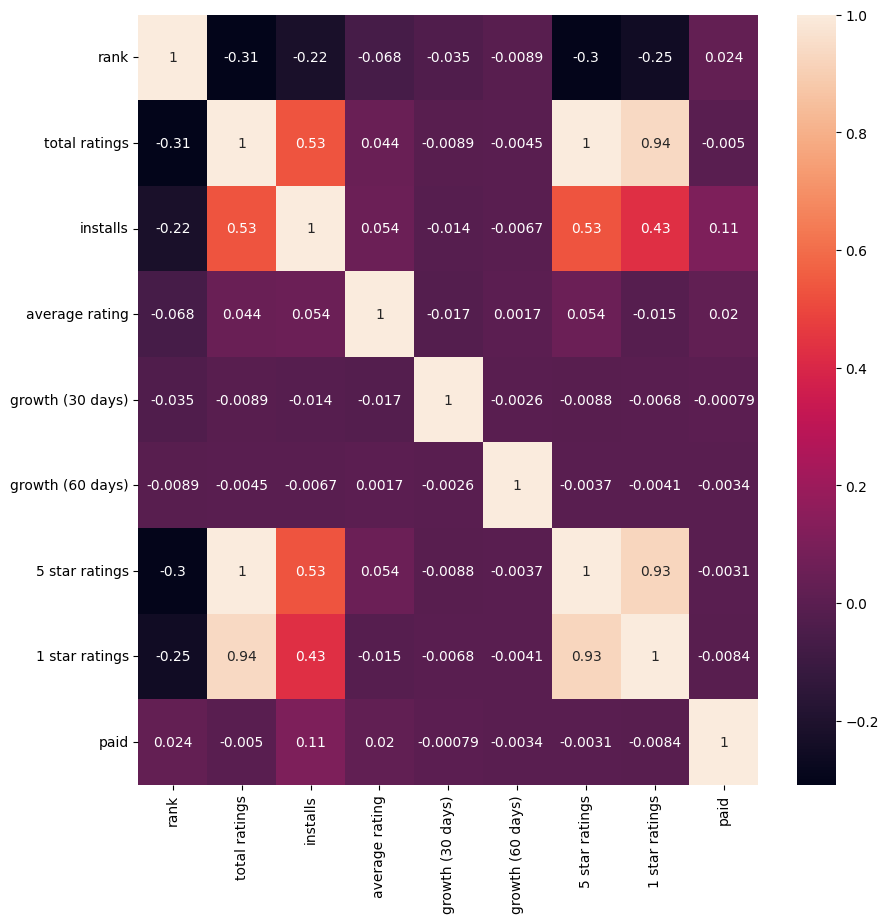

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()